In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x = np.loadtxt("../data/test_x.csv", delimiter=",")
x = x.reshape(-1, 64, 64)
# y = np.loadtxt("../data/train_y.csv", delimiter=",") 

In [29]:
binary_pics = ((x > 250) + 0) * 250

In [30]:
binary_pics = binary_pics.astype(np.uint8)

In [31]:
def count_zeros(e):
    count = 0
    for elem in e:
        if elem == 0.0 or elem == 0:
            count += 1
    return count
        
# print(binary_pics[10153])
# print([count_zeros(binary_pics[x]) for x in range(8000, 8100)])

In [32]:
def biggest_bounding_box(img, isSquare=False):
    ret,thresh = cv2.threshold(img,127,255,0)
    img, contours, h = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    xs, ys, ws, hs = [], [], [], []
    areas = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
#         print(x, y, w, h)
        xs.append(x); ys.append(y); ws.append(w); hs.append(h)
        if isSquare:
            length = max(w,h)
            areas.append(length* length)
        else:
            areas.append(w*h)
    
    areas = np.array(areas)
    biggest = np.argmax(areas)
#     biggests = areas.argsort()[-3:][::-1]
    x = xs[biggest]
    y = ys[biggest]
    w = ws[biggest]
    h = hs[biggest]
#     print(x, y, w, h)
#     plt.imshow(cv2.rectangle(img,(x,y),(x+w,y+h),(100,100,100),1))
#     plt.show()
    return img[y:y+h, x:x+w]
    
#     images = []
    
#     for b in biggests:
#         x = xs[b]
#         y = ys[b]
#         w = ws[b]
#         h = hs[b]
    #     if isSquare:
    #         if w < h:
    #             x = x - (int((h - w)/2))
    #             length = h
    #         else:
    #             y = y - (int((w - h)/2))
    #             length = w

#         images.append(img[y:y+h, x:x+w])
# #         plt.imshow(cv2.rectangle(img,(x,y),(x+w,y+h),(100,100,100),1))

#     #     else:
#     #         plt.imshow(cv2.rectangle(img,(x,y),(x+w,y+h),(100,100,100),1))
# #         plt.show()
#     return images
    
    

In [33]:
# for i in range(5030,5050):
#     biggest_bounding_box(binary_pics[i])
# biggest_bounding_box(binary_pics[35742])

In [34]:


# three_channel_digits = np.zeros((50000, 64, 64, 3))
# for i,p in enumerate(binary_pics):
#     extracted_digits = biggest_bounding_box(p)
#     print(len(extracted_digits))
#     for j,d in enumerate(extracted_digits):
#         x, y = np.shape(d)
#         x_pos = int(32 - (x/2))
#         y_pos = int(32 - (y/2))
#         three_channel_digits[i][x_pos: x_pos + x, y_pos: y_pos + y, j] = d

In [35]:
# np.save("three_channel_digits", three_channel_digits)

In [36]:
# plt.imshow(three_channel_digits[0,:,:,0])

In [37]:
extracted_digits = []
for i,p in enumerate(binary_pics):
    if i%2000 == 0:
        print(i)
    
    extracted_digits.append(biggest_bounding_box(p))

0
2000
4000
6000
8000


In [38]:
# np.save("biggest_digits", extracted_digits)

In [39]:
centered_digits = np.zeros(np.shape(binary_pics))
# centered_digits = np.zeros((50000, 64, 64))
print(len(extracted_digits))


10000


In [40]:
for i, d in enumerate(extracted_digits):
    x, y = np.shape(d)
    x_pos = int(32 - (x/2))
    y_pos = int(32 - (y/2))
    centered_digits[i][x_pos: x_pos + x, y_pos: y_pos + y] = d

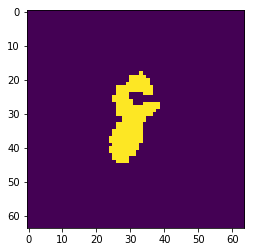

0.0


In [47]:
plt.imshow(centered_digits[2245])
plt.show()

print((centered_digits[4624][30,36]))


In [42]:
np.save("centered_digits_test", centered_digits)

In [43]:
# flattened_digits = centered_digits.reshape(-1,  64*64)
# print(flattened_digits.shape)
# print([count_zeros(flattened_digits[x]) for x in range(9000,9500)])

In [44]:
print(np.shape(centered_digits))
test = np.array([5,4,2])

(10000, 64, 64)


In [45]:
test.argsort()[-5:][::-1]

array([0, 1, 2], dtype=int64)